In [2]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import pandas as pd
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import    find_peaks


In [16]:
#read wave file
audiopath = '../audioSamples/guitarChords1.wav'
samplerate, samples = wav.read(audiopath)


In [17]:
#AVERAGE ABSOLUTE VALUES EVERY THOUSAND SAMPLES
sumSamples=0
averages=[]
for i in range (0,len(samples)):
    if(i%1000):
        sumSamples+=abs(samples[i])
    else:
        average = sumSamples/1000
        sumSamples = 0
        averages.append(average)
averageTimes=np.linspace(0,len(samples)/44100,len(averages))

In [18]:
#FIND PEAKS IN AVERAGES
threshold=500
peaks,_ = find_peaks(averages,width=5)

In [19]:
#for plotting: having trouble plotting
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

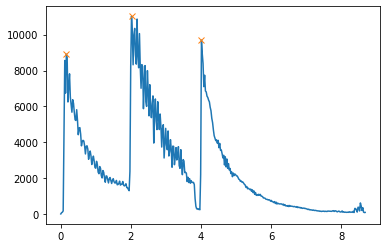

In [20]:
peakVec=np.zeros((len(averages)))
for i in range (0,len(peaks)):
    peakVec[peaks[i]]=averages[peaks[i]]
peakVec = peakVec=np.zeros((len(averages)))
for i in range (0,len(peaks)):
    if(averages[peaks[i]] > threshold):
        peakVec[peaks[i]]=averages[peaks[i]]
peakVec = zero_to_nan(peakVec)
plt.plot(averageTimes,averages)
plt.plot(averageTimes,peakVec, "x")


In [21]:
peakTimes=(peaks)*1000
print(peakTimes)

[  7000  89000 177000]


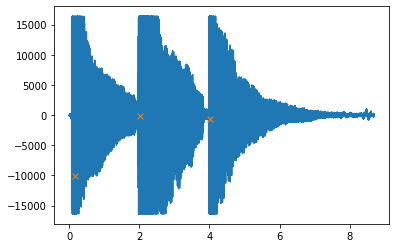

In [22]:
peaksReal = np.zeros((len(samples)))
for i in range (0,len(peaks)):
    if(averages[peaks[i]] > threshold):
        peaksReal[peakTimes[i]]=samples[peakTimes[i]]
times = np.linspace(0,len(samples)/44100,len(samples))

peaksReal = zero_to_nan(peaksReal)

plt.plot(times,samples)
plt.plot(times,peaksReal, "x")

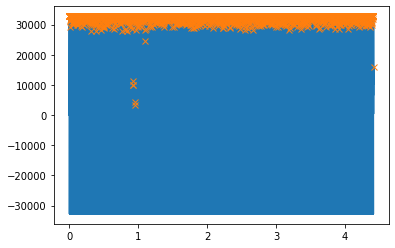

In [15]:
peakAudio, _ = find_peaks(abs(samples),threshold=100)
peaksReal = np.zeros((len(samples)))
for i in range (0,len(peakAudio)):
        peaksReal[peakAudio[i]]=abs(samples[peakAudio[i]])
times = np.linspace(0,len(samples)/44100,len(samples))

peaksReal = zero_to_nan(peaksReal)

plt.plot(times,abs(samples))
plt.plot(times,peaksReal, "x")